In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

# Generate synthetic dataset
np.random.seed(42)  # Ensure reproducibility

data = {
    'Transaction ID': np.arange(1, 10001),
    'Customer ID': np.random.randint(1, 2001, 10000),
    'Purchase Date': pd.date_range(start='2023-01-01', end='2023-12-31', periods=10000),
    'Product Category': np.random.choice(['Electronics', 'Clothing', 'Groceries', 'Furniture', 'Toys'], size=10000),
    'Quantity': np.random.randint(1, 10, size=10000),
    'Price': np.round(np.random.uniform(5, 500, size=10000), 2),
    'Payment Method': np.random.choice(['Credit Card', 'Cash', 'Digital Payment'], size=10000),
    'Location': np.random.choice(['Store A', 'Store B', 'Store C', 'Store D'], size=10000)
}

# Create a DataFrame
df = pd.DataFrame(data)

# Save to CSV (Optional: for later use)
df.to_csv('customer_transactions.csv', index=False)

# Display the first few rows of the dataset
df.head()


,Transaction ID,Customer ID,Purchase Date,Product Category,Quantity,Price,Payment Method,Location
0,1,1127,2023-01-01 00:00:00.000000000,Toys,8,480.23,Digital Payment,Store A
1,2,1460,2023-01-01 00:52:25.274527452,Groceries,2,139.54,Cash,Store C
2,3,861,2023-01-01 01:44:50.549054905,Clothing,2,373.56,Credit Card,Store B
3,4,1295,2023-01-01 02:37:15.823582358,Groceries,5,212.42,Digital Payment,Store A
4,5,1131,2023-01-01 03:29:41.098109810,Electronics,1,245.56,Digital Payment,Store D


In [2]:
# Summary Statistics
print("Summary Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

Summary Statistics:
       Transaction ID   Customer ID        Purchase Date      Quantity  \
count     10000.00000  10000.000000                10000  10000.000000   
mean       5000.50000   1009.384600  2023-07-02 00:00:00      4.986500   
min           1.00000      1.000000  2023-01-01 00:00:00      1.000000   
25%        2500.75000    516.000000  2023-04-02 00:00:00      3.000000   
50%        5000.50000   1010.000000  2023-07-02 00:00:00      5.000000   
75%        7500.25000   1508.000000  2023-10-01 00:00:00      7.000000   
max       10000.00000   2000.000000  2023-12-31 00:00:00      9.000000   
std        2886.89568    575.015752                  NaN      2.577398   

              Price  
count  10000.000000  
mean     252.102667  
min        5.030000  
25%      129.682500  
50%      252.010000  
75%      374.252500  
max      499.870000  
std      142.115889  

Missing Values:
Transaction ID      0
Customer ID         0
Purchase Date       0
Product Category    0
Quantity  


Total Sales: $2521026.67
Average Transaction Value: $252.10

Transactions per Month:
Month
2023-01    852
2023-02    769
2023-03    852
2023-04    824
2023-05    851
2023-06    825
2023-07    851
2023-08    852
2023-09    824
2023-10    851
2023-11    824
2023-12    825
Freq: M, Name: count, dtype: int64


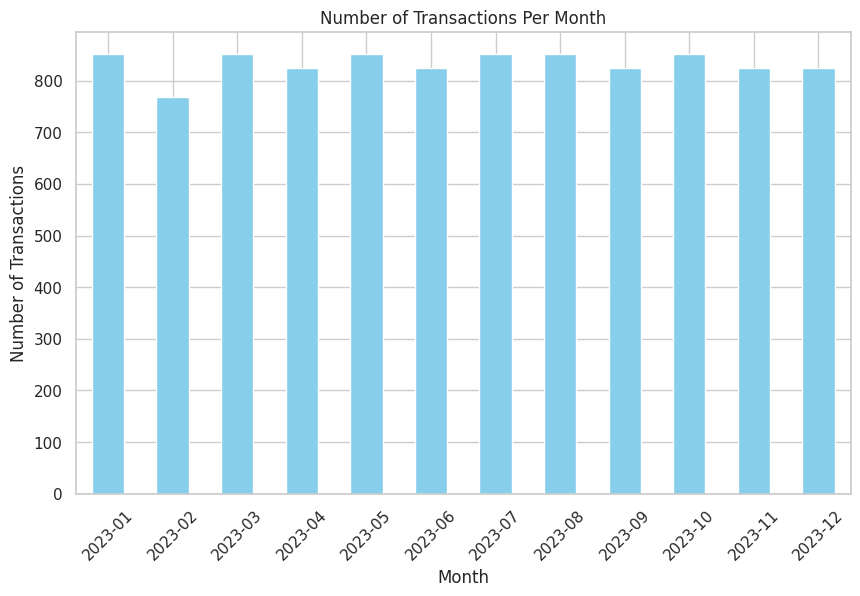

In [3]:
# Total sales and average transaction value
total_sales = df['Price'].sum()
avg_transaction_value = df['Price'].mean()
print(f"\nTotal Sales: ${total_sales:.2f}")
print(f"Average Transaction Value: ${avg_transaction_value:.2f}")

# Number of transactions per month
df['Month'] = df['Purchase Date'].dt.to_period('M')
transactions_per_month = df['Month'].value_counts().sort_index()
print("\nTransactions per Month:")
print(transactions_per_month)

# Plot transactions per month
plt.figure(figsize=(10, 6))
transactions_per_month.plot(kind='bar', color='skyblue')
plt.title('Number of Transactions Per Month')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()


Distribution of Purchases by Product Category:
Product Category
Clothing       2049
Toys           2038
Furniture      2003
Electronics    2001
Groceries      1909
Name: count, dtype: int64


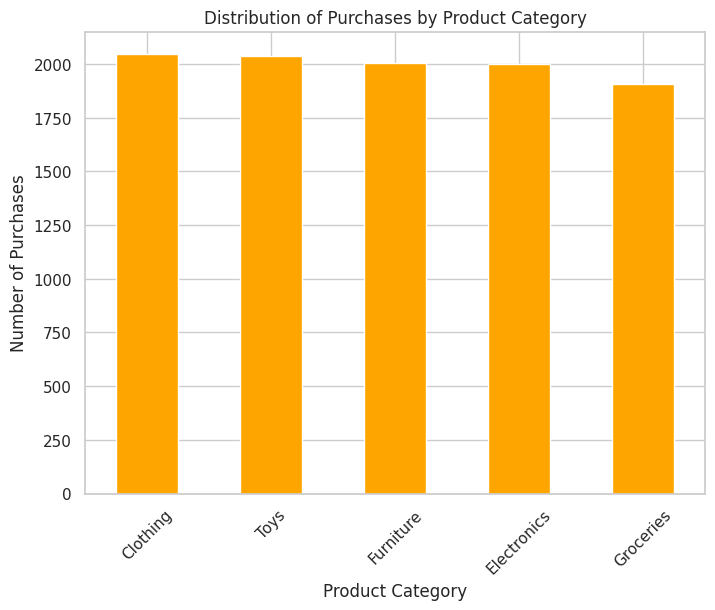


Average Quantity Purchased per Transaction: 4.99


In [4]:
# Distribution of purchases by product category
category_distribution = df['Product Category'].value_counts()
print("\nDistribution of Purchases by Product Category:")
print(category_distribution)

# Plot product category distribution
plt.figure(figsize=(8, 6))
category_distribution.plot(kind='bar', color='orange')
plt.title('Distribution of Purchases by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.show()

# Average quantity purchased per transaction
avg_quantity = df['Quantity'].mean()
print(f"\nAverage Quantity Purchased per Transaction: {avg_quantity:.2f}")



Distribution of Payment Methods:
Payment Method
Cash               3401
Digital Payment    3322
Credit Card        3277
Name: count, dtype: int64


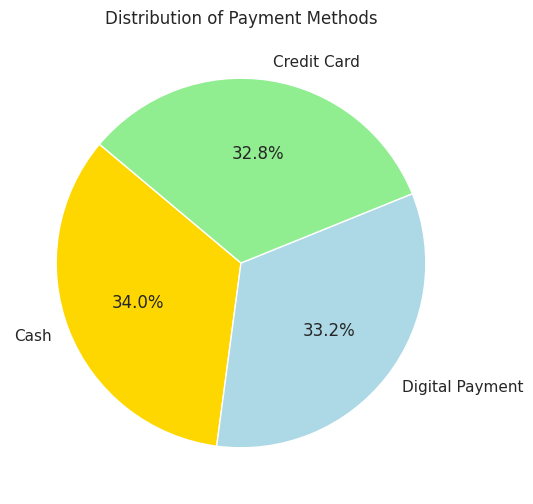

In [5]:
# Distribution of payment methods
payment_method_distribution = df['Payment Method'].value_counts()
print("\nDistribution of Payment Methods:")
print(payment_method_distribution)

# Plot payment method distribution
plt.figure(figsize=(8, 6))
payment_method_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'lightblue', 'lightgreen'])
plt.title('Distribution of Payment Methods')
plt.ylabel('')  # Hide the y-axis label for clarity
plt.show()


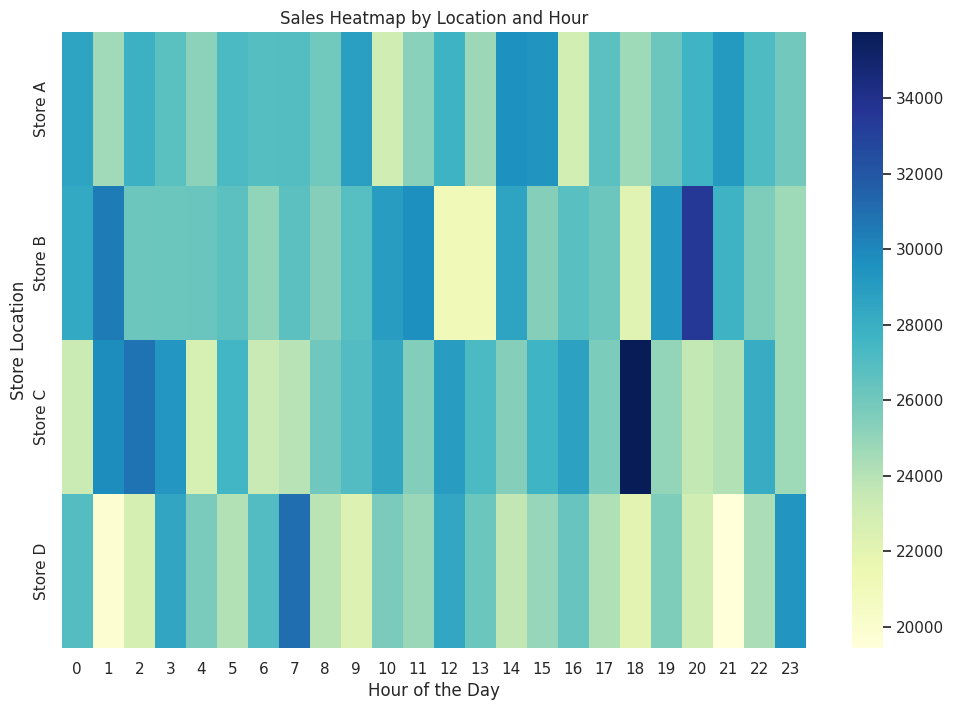

In [6]:
# Sales heatmap by location and time of day
df['Hour'] = df['Purchase Date'].dt.hour
sales_pivot = df.pivot_table(values='Price', index='Location', columns='Hour', aggfunc='sum', fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(sales_pivot, annot=False, fmt='.2f', cmap='YlGnBu')
plt.title('Sales Heatmap by Location and Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Store Location')
plt.show()


Customer Segments Based on Transaction Frequency:
count
Low-frequency    1987
Name: count, dtype: int64


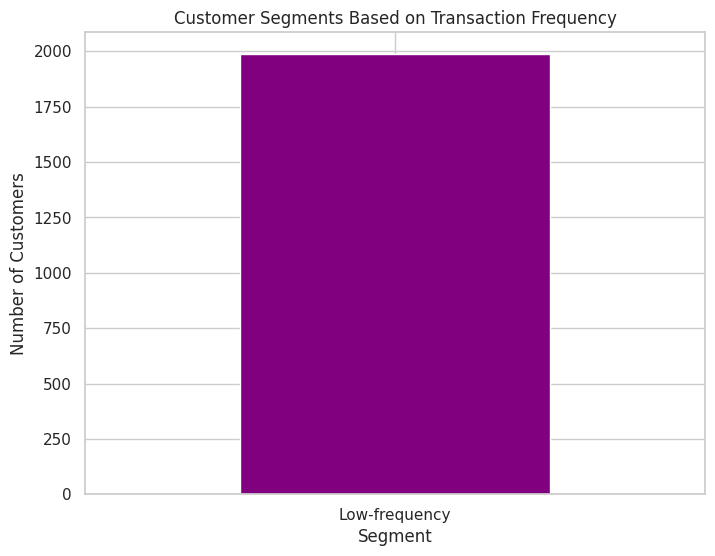

In [7]:
# Customer segmentation based on transaction frequency
customer_frequency = df['Customer ID'].value_counts()

# Define segments
def categorize_frequency(x):
    if x > 50:
        return 'High-frequency'
    elif x > 20:
        return 'Medium-frequency'
    else:
        return 'Low-frequency'

customer_segments = customer_frequency.apply(categorize_frequency).value_counts()
print("\nCustomer Segments Based on Transaction Frequency:")
print(customer_segments)

# Plot customer segments
plt.figure(figsize=(8, 6))
customer_segments.plot(kind='bar', color='purple')
plt.title('Customer Segments Based on Transaction Frequency')
plt.xlabel('Segment')
plt.ylabel('Number of Customers')
plt.xticks(rotation=0)
plt.show()